<center><h4>Perceptron learning algorithm</h4></center>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating linearly seperable 2d data
def generate_dataset_q1(n, gamma): #gamma is related to spacing between two datasets
    # Generate random 2D data points
    count = 0
    x = []
    y = []
    r1 = np.random.rand() #value at x =0
    r2 = np.random.rand() # value at x =1
    while(count < n):
        point = np.random.rand(2,1)
        if( point[1] >= (r2-r1)*point[0] + r1 + gamma  ):
            x.append(point)
            y.append(-1)
            count = count + 1

        if(  point[1] <= (r2-r1)*point[0] + r1 - gamma  ):
            x.append(point)
            y.append(1)
            count = count + 1
    x = torch.tensor(x)
    x = x.reshape(-1, 2)
    y = torch.tensor(y)
    return x,y

<h4>Training the Perceptron:</h4>
<p>The function train_perceptron(x, y, w, nb_epochs_max) implements the perceptron training algorithm.
It takes four parameters: x (input features), y (labels), w (weights of the perceptron), and nb_epochs_max (maximum number of epochs to train).
The function iterates over the data for the specified number of epochs.
For each data point, if the current weights w misclassify the point (dot product of x[i] and w multiplied by y[i] is less than or equal to 0), the weights are updated using the perceptron update rule: w = w + y[i] * x[i].
The function keeps track of the number of weight updates (nb_changes) and the total number of iterations.
If no weight updates occur in an epoch, the training is stopped using early stopping.
The updated weights w and the total number of iterations are returned.</p>

In [3]:
#The perceptron training algorithm

def train_perceptron(x,y,w, nb_epochs_max):  
    iterations = 0
    for e in range(nb_epochs_max):
        nb_changes = 0
        for i in range(x.size(0)): #size(0) 1st dimension that is noof rows
              if x[i].dot(w) * y[i] <= 0:
                w = w + y[i] * x[i]
                nb_changes = nb_changes + 1
                iterations = iterations +1
        if nb_changes == 0:
            print('Early stopping at epoch number',e) 
            break;
        print('Number of changes: ',nb_changes)  # prints the number of chages in the end  
    return w,iterations

<h4>Training and Visualization:</h4>
<p>The code defines the number of data points n and a list of gammas (spacing values) to experiment with.
For each gamma value, the code generates the dataset using generate_dataset_q1() and prepares the input features x.
It initializes the weights w as zeros.
It plots the data points and the initial weight line before training.
Then, it trains the perceptron using train_perceptron() and collects the total number of iterations.
After training, it plots the data points and the final weight line.
The process is repeated for different gamma values, and the number of iterations is stored in the noof_iter list.</p>

/var/folders/td/d06052c13fx_0ckcn_5bft1c0000gn/T/ipykernel_38740/3829096792.py:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  x = torch.tensor(x)


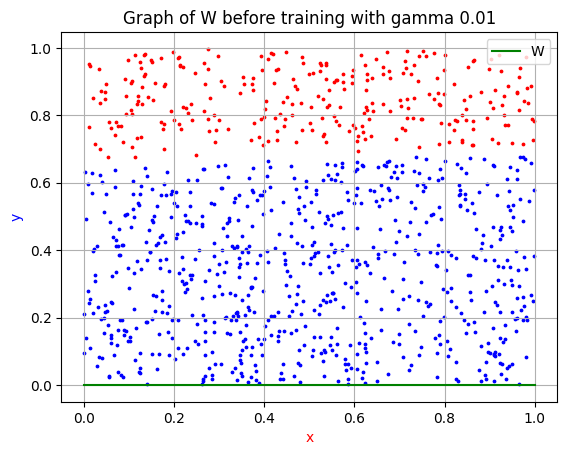

Number of changes:  64
Early stopping at epoch number 1


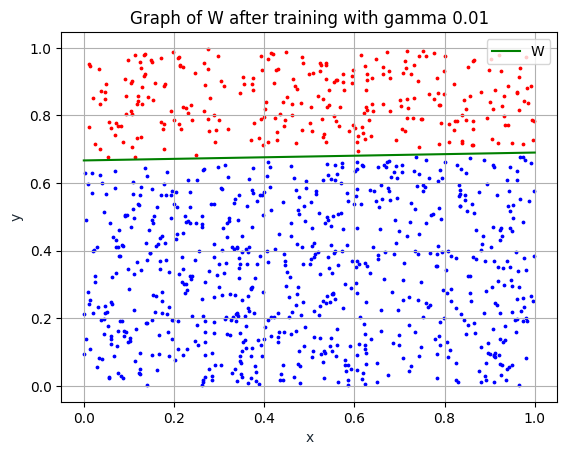

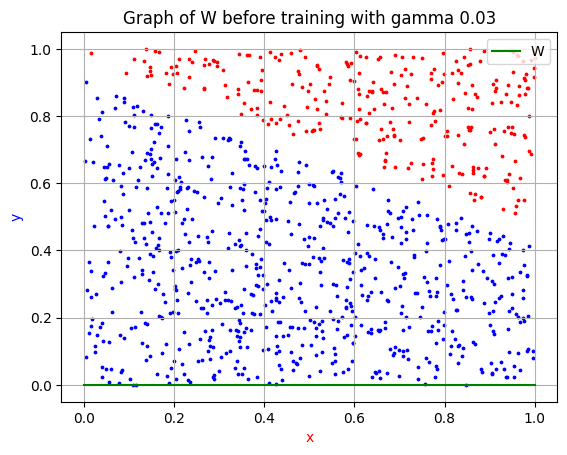

Number of changes:  56
Early stopping at epoch number 1


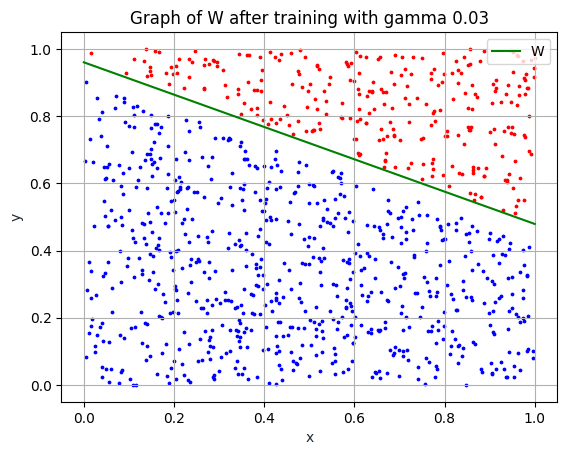

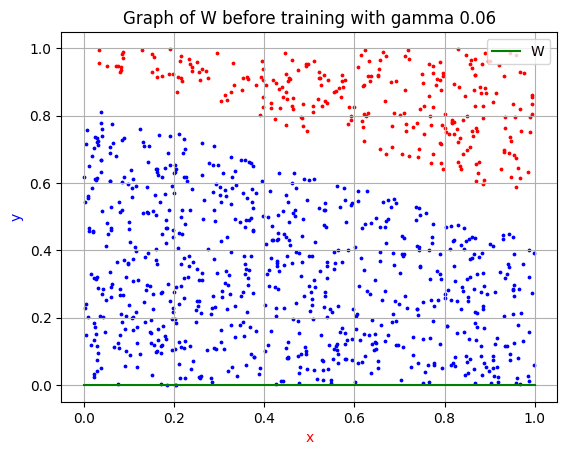

Number of changes:  20
Number of changes:  13
Early stopping at epoch number 2


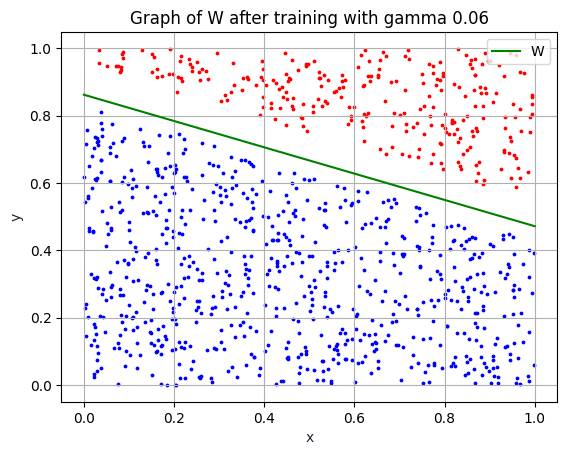

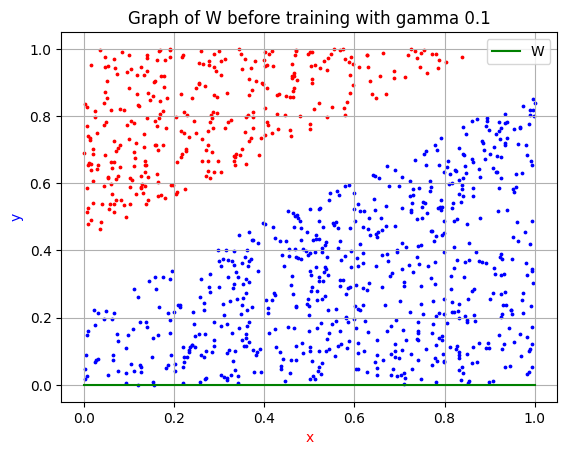

Number of changes:  15
Early stopping at epoch number 1


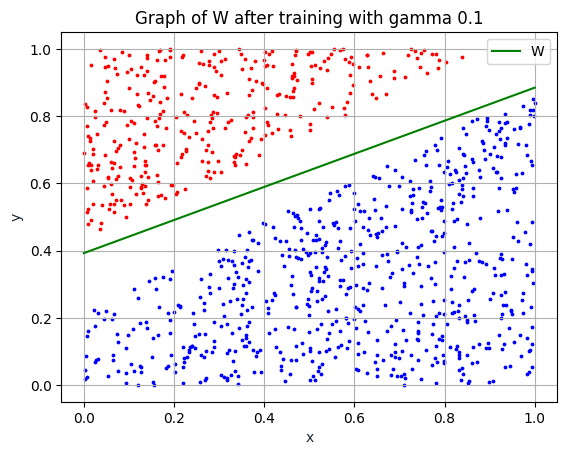

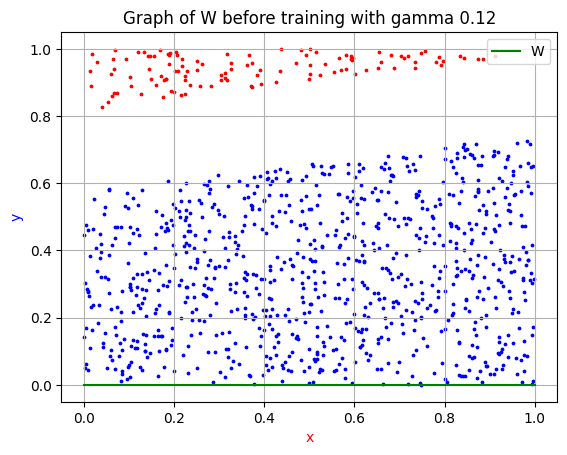

Number of changes:  7
Early stopping at epoch number 1


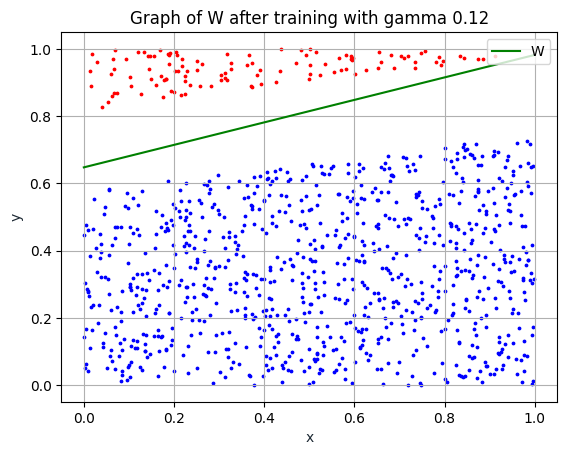

In [4]:
n = 1000
gammas = [0.01,0.03,0.06,0.10,0.12]
noof_iter = []

for gamma in gammas:
    t,y = generate_dataset_q1(n, gamma)
    x=torch.empty(n,t.size(1)+1).fill_(1)
    x[::1,:2] = t

    # plot the data and W before training
    x1 = np.linspace(0,1,n)
    y1 = np.zeros(n) 
    plt.plot(x1, y1, 'green', label='W')
    plt.title('Graph of W before training with gamma {}'.format(gamma))
    plt.xlabel('x', color='red')
    plt.ylabel('y', color='blue')
    plt.legend(loc='upper right')
    for i in range(len(x)):
        if (y[i]  == -1):
            plt.scatter(x[i,0],x[i,1],c = 'red',s = 3)
        else:
            plt.scatter(x[i,0],x[i,1],c = 'blue', s= 3)
    plt.grid()
    plt.show()

    #initialize w
    w = torch.zeros(x.size(1))
    iterations = 0
    w,iterations = train_perceptron(x, y,w,200)
    noof_iter.append(iterations)

    # Plot the data and W after training
    #label = W.T * [x,y] solving for discriminating surface we get 0 = w[0]x+W[1]y + W[2]

    x1 = np.linspace(0,1,100)
    def fun(x):
        return -w[0]/w[1]*x - w[2]/w[1]
    vec_fun = np.vectorize(fun)
    plt.plot(x1, vec_fun(x1), 'green', label='W')

    plt.title('Graph of W after training with gamma {}'.format(gamma))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper right')

    for i in range(len(x)):
        if (y[i]  == -1):
            plt.scatter(x[i,0],x[i,1],c = 'red',s = 3)
        else:
            plt.scatter(x[i,0],x[i,1],c = 'blue', s= 3)
    plt.grid()
    plt.show()

<h4>Plotting Results:</h4>
<p>Finally, the code plots a graph showing the relationship between the gamma values and the number of iterations required for convergence.
The x-axis represents the gamma values, and the y-axis represents the number of iterations.
The graph helps visualize how the separability (controlled by gamma) affects the convergence of the perceptron.</p>

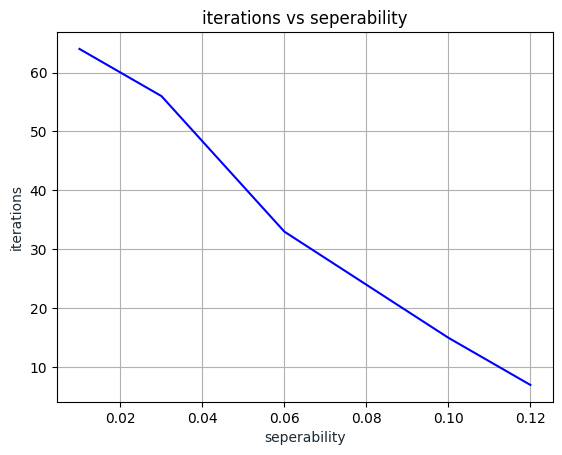

In [5]:
plt.title('iterations vs seperability')
plt.xlabel('seperability', color='#1C2833')
plt.ylabel('iterations', color='#1C2833')
plt.plot(gammas,noof_iter,c = 'blue')
plt.grid()
plt.show() 

<center><h4>Gradient descent for training a linear classifier</h4></center>

In [6]:
#creating linearly seperable 2d data
def generate_dataset_q2(n, gamma):
    # Generate random 2D data points
    count = 0
    x = []
    y = []
    r1 = np.random.rand() #value at x =0
    r2 = np.random.rand() # value at x =1
    while(count < n):
        point = np.random.rand(2,1)
        if( point[1] >= (r2-r1)*point[0] + r1 + gamma ):
            x.append(point)
            y.append(-1)
            count = count + 1

        if(  point[1] <= (r2-r1)*point[0] + r1 - gamma ):
            x.append(point)
            y.append(1)
            count = count + 1
    x = torch.tensor(x)
    x = x.reshape(-1, 2)
    y = torch.tensor(y)
    y = y.reshape(n,1)
    return x,y

In [7]:
def gradient_hinge_loss_q2(y1,w1,x1):
    z = torch.zeros(x1.size(-1))
    if( y1*( torch.dot(w1,x1) ) <= 1):
        return -y1*x1  
    return z 
 
def avg_gradient_hinge_loss(y_actual,w,x):
    phi = torch.zeros(x.size(1))
    for i in range(x.size(0)):
        phi =  phi + gradient_hinge_loss_q2(y_actual[i],w,x[i])
    return phi/x.size(0)

def gradient_descent(x,y,w,alpha,nb_epochs_max):  #alpha is learning rate
    nb_changes = 0
    for e in range(nb_epochs_max):
        k = w - alpha*( avg_gradient_hinge_loss(y,w,x) )
        if torch.norm(k - w) < 1e-4 :
            print('Early stopping at epoch number %d',e) 
            break;
        else:
            w = k
            nb_changes += 1
    print('Number of changes: ',nb_changes)  # prints the number of changes in the end  
    return w,nb_changes

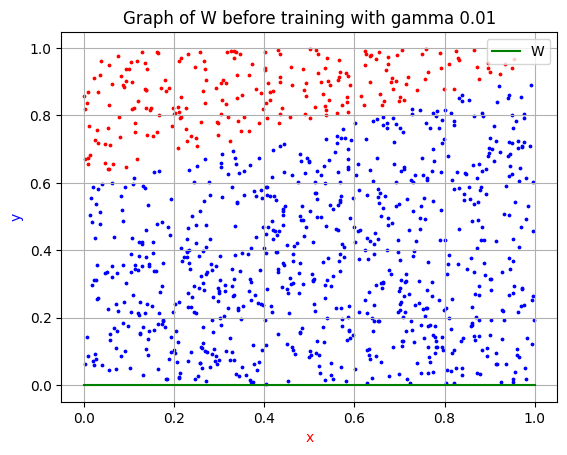

Number of changes:  1000


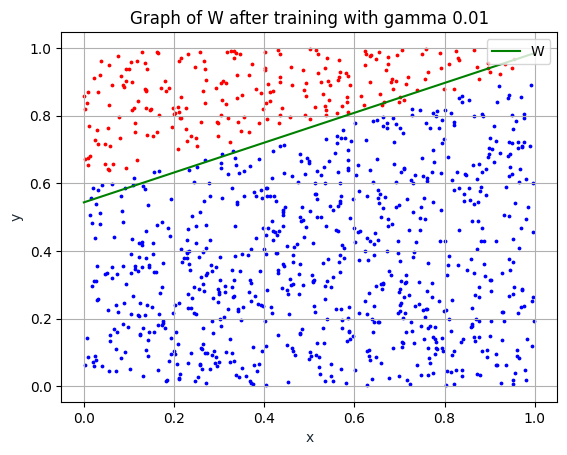

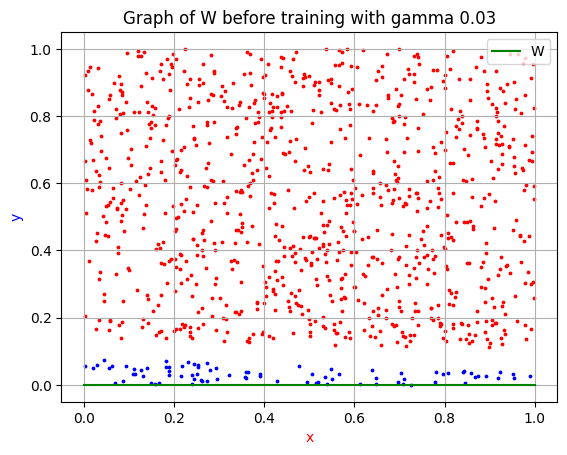

Number of changes:  1000


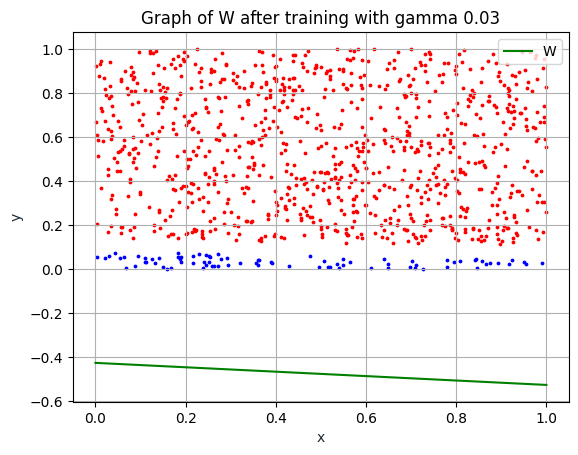

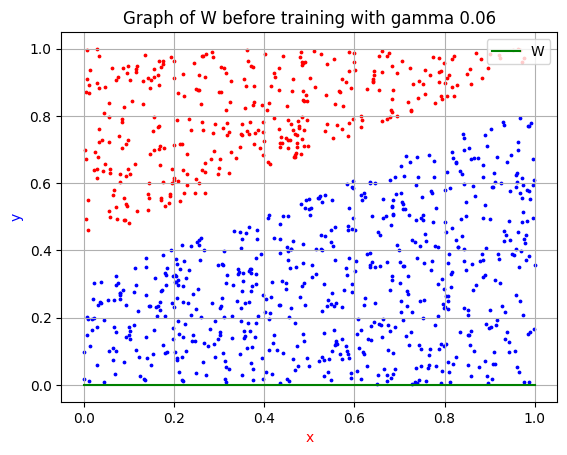

Number of changes:  1000


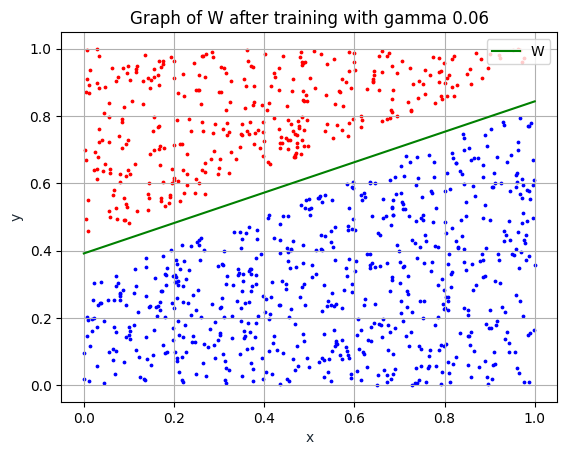

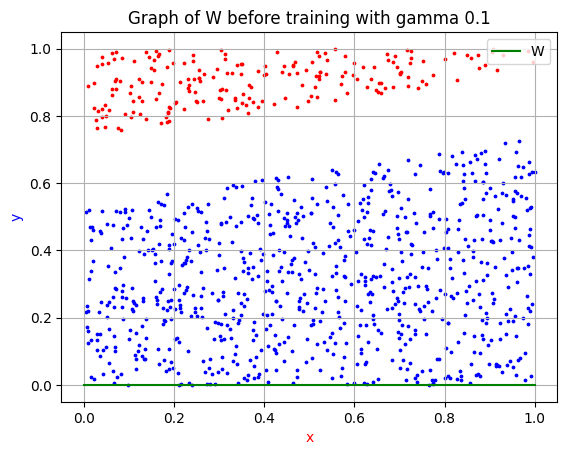

Number of changes:  1000


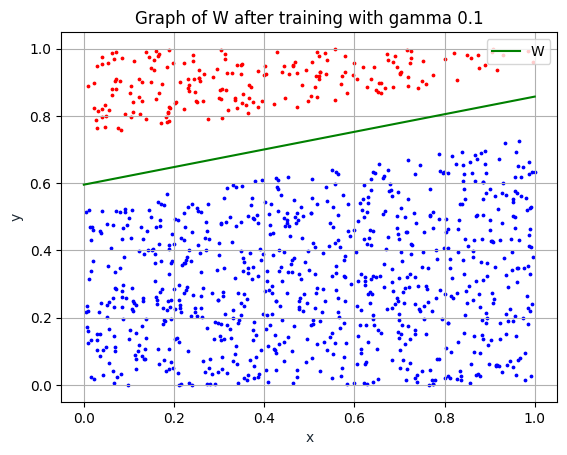

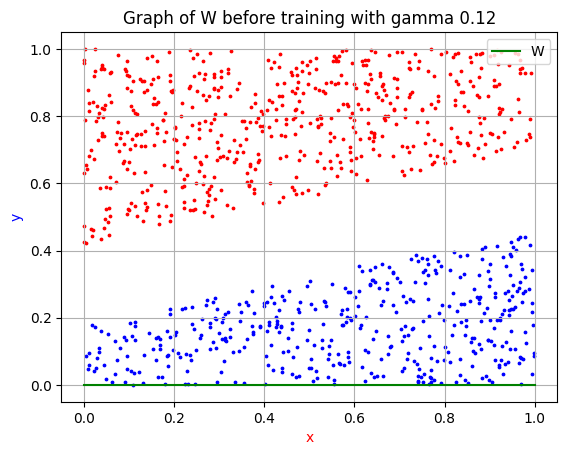

Number of changes:  1000


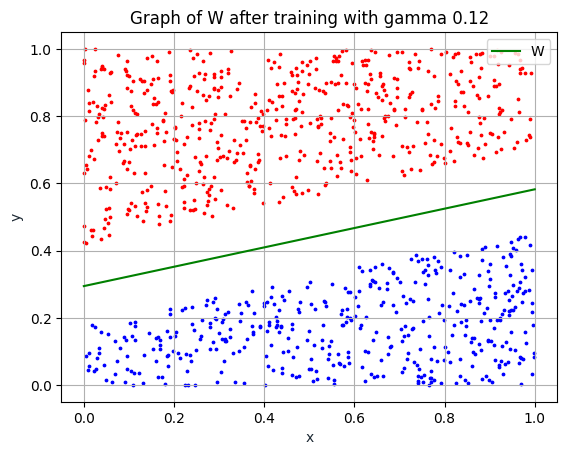

In [8]:
n = 1000
gammas = [0.01,0.03,0.06,0.10,0.12]
noof_iter = []

for gamma in gammas:
    t,y = generate_dataset_q2(n, gamma)
    x=torch.empty(n,t.size(1)+1).fill_(1)
    x[::1,:2] = t
   
    # plot the data and W before training
    x1 = np.linspace(0,1,n)
    y1 = np.zeros(n) 
    plt.plot(x1, y1, 'green', label='W')
    plt.title('Graph of W before training with gamma {}'.format(gamma))
    plt.xlabel('x', color='red')
    plt.ylabel('y', color='blue')
    plt.legend(loc='upper right')
    for i in range(len(x)):
        if (y[i]  == -1):
            plt.scatter(x[i,0],x[i,1],c = 'red',s = 3)
        else:
            plt.scatter(x[i,0],x[i,1],c = 'blue', s= 3)
    plt.grid()
    plt.show()

    #initialize w
    w = torch.zeros(x.size(1))
    iterations = 0
    w,iterations = gradient_descent(x,y,w,0.1,1000)
    noof_iter.append(iterations)

    # Plot the data and W after training
    #label = W.T * [x,y] solving for discriminating surface we get 0 = w[0]x+W[1]y + W[2]

    x1 = np.linspace(0,1,100)
    def fun(x):
        return -w[0]/w[1]*x - w[2]/w[1]
    vec_fun = np.vectorize(fun)
    plt.plot(x1, vec_fun(x1), 'green', label='W')


    plt.title('Graph of W after training with gamma {}'.format(gamma))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper right')

    for i in range(len(x)):
        if (y[i]  == -1):
            plt.scatter(x[i,0],x[i,1],c = 'red',s = 3)
        else:
            plt.scatter(x[i,0],x[i,1],c = 'blue', s= 3)
    plt.grid()
    plt.show()

<p>we we compare two methods of finding optimal solutions and these are the observations</p>
<h4>Update Rule:</h4>
<p>The perceptron training algorithm uses a simple update rule that directly updates the weights based on the misclassified data points. It updates the weights by adding the product of the misclassified point and its label: w = w + y[i] * x[i].
In contrast, gradient descent aims to minimize a cost function by iteratively updating the weights in the direction of steepest descent. The updates are proportional to the negative gradient of the cost function with respect to the weights: w = w - learning_rate * gradient.
For linearly separable data, the perceptron's update rule is more effective because it directly adjusts the weights based on the misclassified points, quickly moving the decision boundary towards the optimal solution.</p>
<h4>Convergence:</h4>
<p>The perceptron algorithm guarantees convergence on linearly separable data. If the data is linearly separable, the algorithm is guaranteed to find a separating hyperplane in a finite number of steps.
On the other hand, gradient descent does not guarantee convergence to a global minimum in the case of linearly separable data. Since the cost function in linearly separable cases has multiple global minima, gradient descent might converge to any of those minima, which may not necessarily correspond to a perfect separation.</p>
<h4>Computational Efficiency:</h4>.
The perceptron algorithm is computationally efficient and requires minimal calculations. It only updates the weights when a misclassification occurs, which reduces the number of weight updates.
Gradient descent, however, involves calculating gradients for all data points in each iteration, which can be computationally expensive, especially for large datasets.
<h4>Margin Maximization:</h4>
<p>The perceptron algorithm directly optimizes the margin between the decision boundary and the closest data points. It aims to maximize the margin, which can lead to better generalization and improved robustness to noise.
In contrast, gradient descent focuses on minimizing the overall error or cost function. While minimizing the error is important, it does not explicitly optimize the margin, which can result in less separation between the classes.</p>

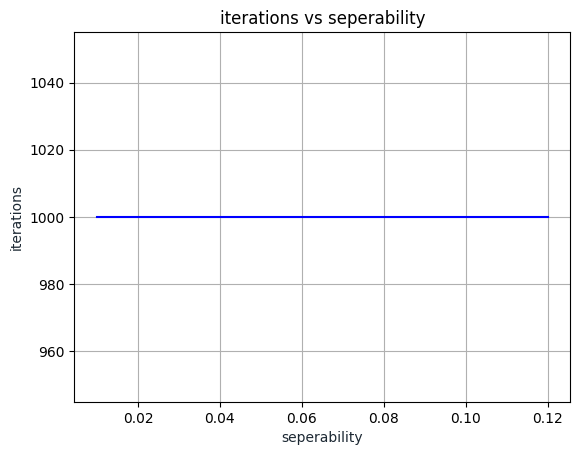

In [9]:
plt.title('iterations vs seperability')
plt.xlabel('seperability', color='#1C2833')
plt.ylabel('iterations', color='#1C2833')
plt.plot(gammas,noof_iter,c = 'blue')
plt.grid()
plt.show() 

<p>In summary, the perceptron algorithm performs well on linearly separable data because it has a simple update rule that directly adjusts the weights based on misclassified points, guarantees convergence, is computationally efficient, and maximizes the margin. In contrast, gradient descent may struggle with linearly separable data due to the lack of guarantees of convergence to a global minimum and the computational overhead of calculating gradients for all data points.</p>